In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [4]:
df.shape

(1002, 17)

In [5]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [6]:
print(df.dtypes)

name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object


In [7]:
# Creating a new feature
df['vehicle_age'] = 2024 - df['year']

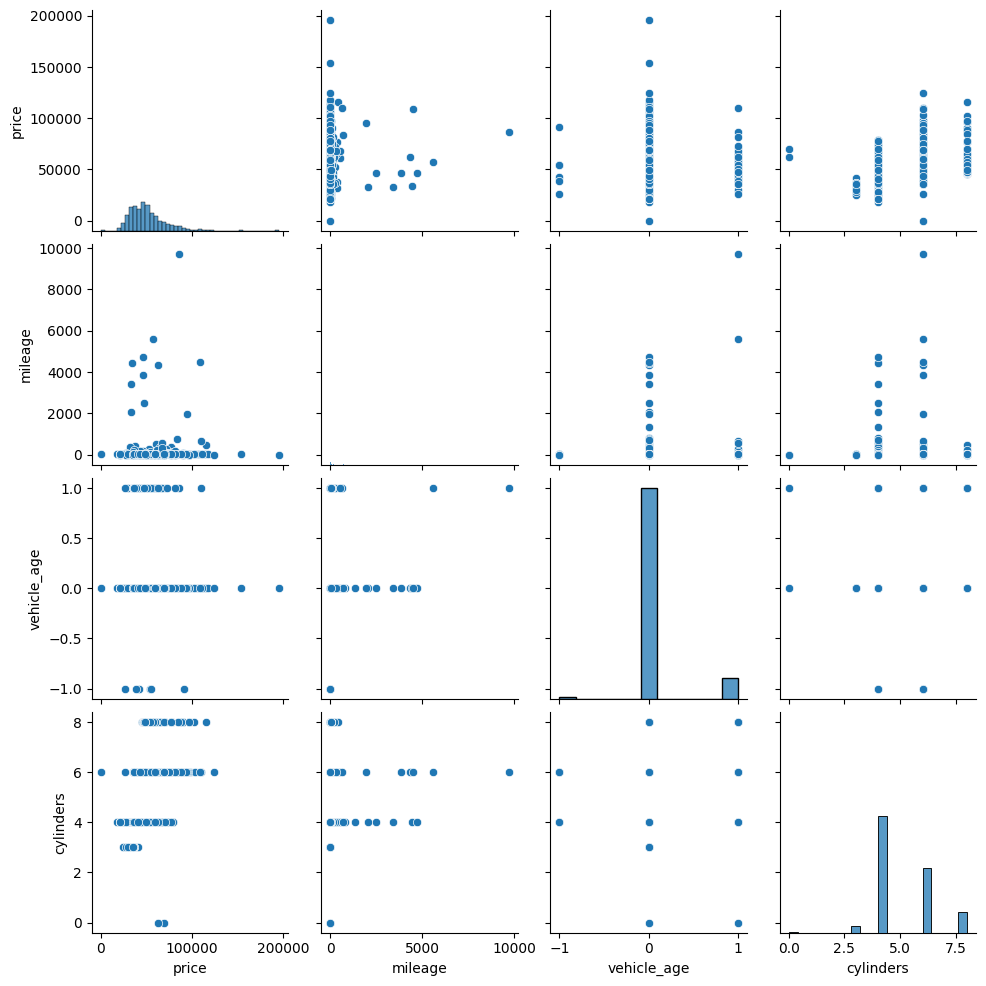

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['price', 'mileage', 'vehicle_age', 'cylinders']])
plt.show()

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 801
Rows in test set: 201


In [13]:
train_set.describe()

,year,price,cylinders,mileage,doors,vehicle_age
count,801.000000,780.000000,712.000000,776.000000,795.000000,801.000000
mean,2023.911361,50729.689744,5.022472,41.582474,3.938365,0.088639
std,0.309650,19284.807774,1.397023,308.802020,0.288267,0.309650
min,2023.000000,0.000000,0.000000,0.000000,2.000000,-1.000000
25%,2024.000000,36700.500000,4.000000,4.000000,4.000000,0.000000
50%,2024.000000,47340.000000,4.000000,8.000000,4.000000,0.000000
75%,2024.000000,59429.000000,6.000000,13.000000,4.000000,0.000000
max,2025.000000,195895.000000,8.000000,5581.000000,5.000000,1.000000


In [22]:
X_train_set = train_set.drop("price",axis=1)
Y_train_set = train_set["price"]

X_train_set.describe()


,year,cylinders,mileage,doors,vehicle_age
count,801.000000,712.000000,776.000000,795.000000,801.000000
mean,2023.911361,5.022472,41.582474,3.938365,0.088639
std,0.309650,1.397023,308.802020,0.288267,0.309650
min,2023.000000,0.000000,0.000000,2.000000,-1.000000
25%,2024.000000,4.000000,4.000000,4.000000,0.000000
50%,2024.000000,4.000000,8.000000,4.000000,0.000000
75%,2024.000000,6.000000,13.000000,4.000000,0.000000
max,2025.000000,8.000000,5581.000000,5.000000,1.000000


In [23]:

Y_train_set.describe()

count       780.000000
mean      50729.689744
std       19284.807774
min           0.000000
25%       36700.500000
50%       47340.000000
75%       59429.000000
max      195895.000000
Name: price, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_set,Y_train_set)

ValueError: could not convert string to float: '2023 Jeep Grand Cherokee Laredo'